Image size is (3800, 3000)


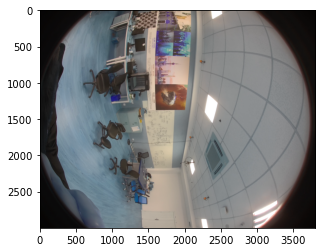

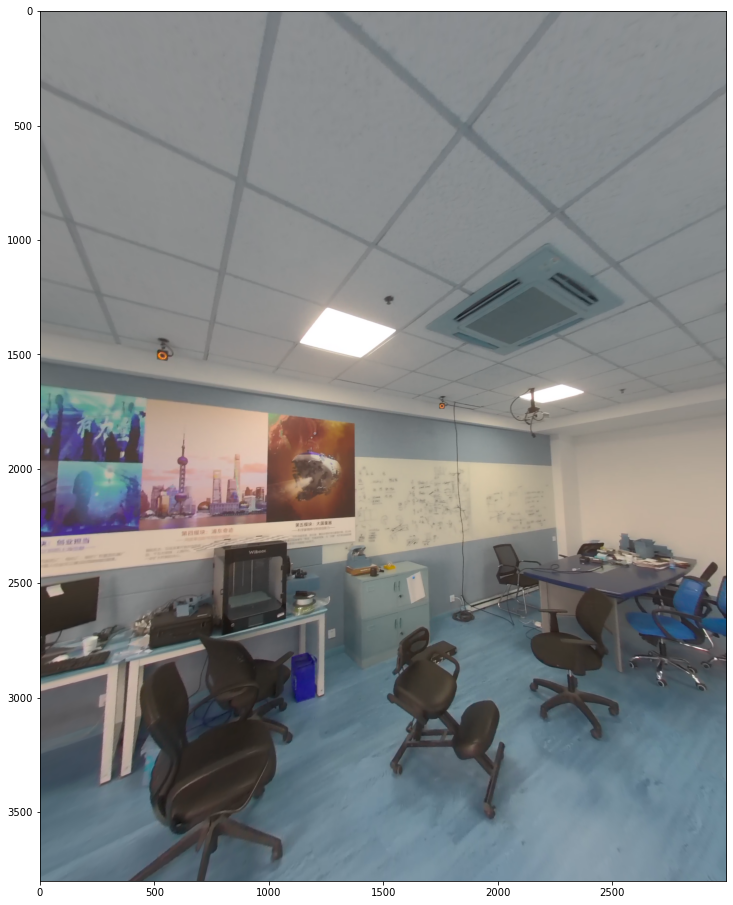

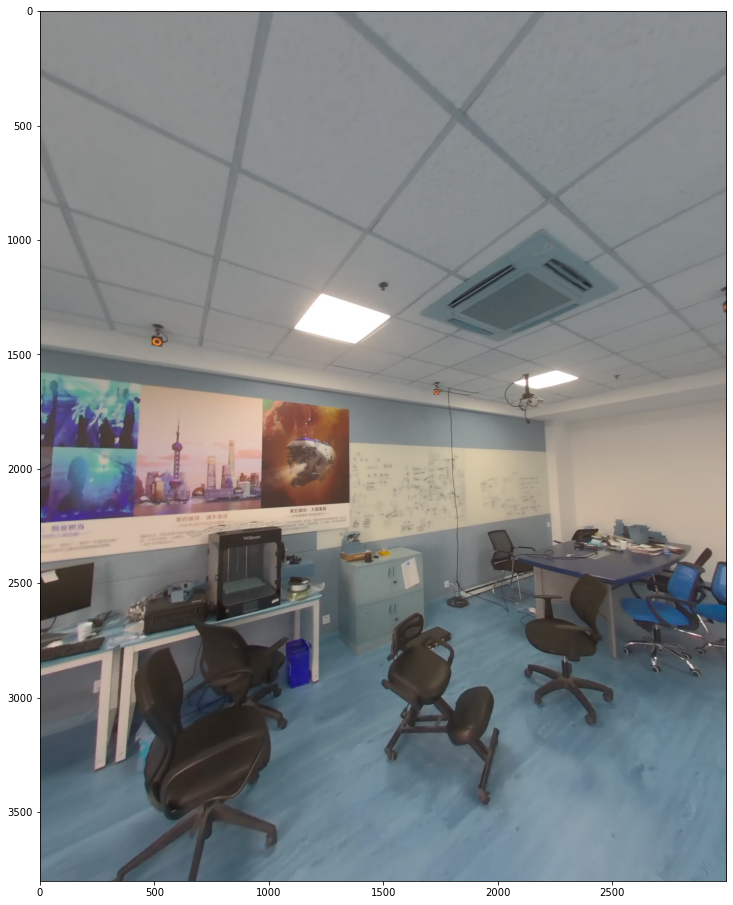

In [37]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

raw_im = cv2.imread("/home/dengnc/dvs/data/__captured/dalab1/raw_images/1/image001.png")
im_size = raw_im.shape[:-1][::-1]
print("Image size is", im_size)

plt.figure()
plt.imshow(raw_im)

K = np.array([
    [1369.757446,       0, 1838.643555],
    [      0, 1369.757446, 1524.068604],
    [      0,       0,    1]
])
newK = np.array([
    [1369.26, 0, 1900],
    [0, 1369.26, 1500],
    [0, 0, 1]
])
D = np.array([[-0.044752], [-0.006285], [0.000000], [0.000000]])

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, None, K, im_size, cv2.CV_16SC2)
undistorted_im = cv2.remap(raw_im, map1, map2, interpolation=cv2.INTER_LINEAR,
                           borderMode=cv2.BORDER_CONSTANT)
undistorted_im = cv2.rotate(undistorted_im, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.figure(figsize=(16,16))
plt.imshow(undistorted_im)

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, None, newK, im_size, cv2.CV_16SC2)
undistorted_im = cv2.remap(raw_im, map1, map2, interpolation=cv2.INTER_LINEAR,
                           borderMode=cv2.BORDER_CONSTANT)
undistorted_im = cv2.rotate(undistorted_im, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.figure(figsize=(16,16))
plt.imshow(undistorted_im)

